In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11.ipynb")

# Lab 11: Multiple Linear Regression and Feature Selection/Engineering

Welcome to Lab 11! In this lab we will introduce feature engineering, build multiple linear regression models, and investigate methods to evaluate the "goodness of fit" for linear models.

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** 

**Collaboration Policy:** Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below** (it's a good way to learn your classmates' names).

**Collaborators:** 

List collaborators here.

**Note:** In this notebook a custom figure size has been configured. Click [here](https://matplotlib.org/users/customizing.html) to read the documentation about customizing aspects of matplotlib.

Run the cell below.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 100
from sklearn.linear_model import LinearRegression

# 1. Interpreting the Estimated Parameters

In Foundations of Data Science we learned about the regression line in section 15.2 of the textbook, Computational and Inferential Thinking. To refresh your memory about the concept click [here](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#).

In regression with a single independent variable, the coefficient of the independent variable tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one. Interpreting the intercept in a regression model isn’t always straightforward. The intercept (often labeled the constant) is the expected mean value of the independent variable when the independent variable is 0. If the independent variable is never equal to 0, then the intercept has no meaning.

We will continue our analysis of the `mpg` data set.

**Note:** We load the full data set, and drop any rows that have missing data.

In [3]:
mpg = sns.load_dataset('mpg').dropna()
mpg = mpg.sort_values('horsepower', ascending = True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


In [4]:
mpg_model = LinearRegression()
mpg_model.fit(mpg[['horsepower']], mpg['mpg'])
slope = mpg_model.coef_[0]
y_int = mpg_model.intercept_ 
print("The estimated parameter for the slope is", slope)
print("The estimated parameter for the y-intercept is", y_int)

The estimated parameter for the slope is -0.15784473335365362
The estimated parameter for the y-intercept is 39.93586102117047


What is the interpretation of the value of the slope, within the context of the modeling scenario?

For every increase of 1 horsepower, the model predicts a decrease in MPG of 0.158.

Does the intercept have meaning for this model? Explain.

The intercept would indicate the MPG of a vehicle with 0 horsepower, which is not a realistic scenario. Therefore, the value is essentially meaningless and an artifact of the model.

# 2. Re-expression

In the previous lab we showed how to establish relationships between one explanatory variable and a response variable. 

Let's review. Run the cell below to see a scatter plot of the data.

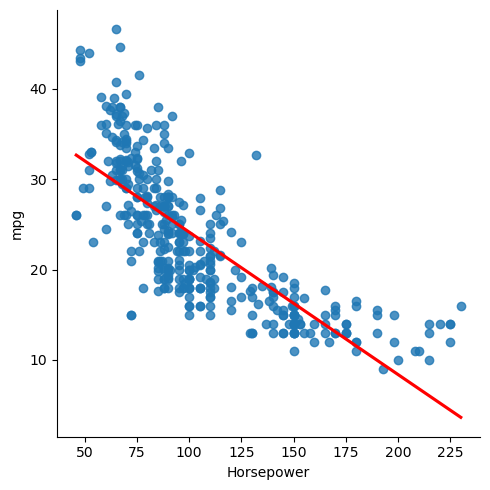

In [5]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = mpg, ci = None, line_kws = {'color': 'red'})
plt.xlabel("Horsepower")
plt.ylabel("mpg");

To straighten the data we re-expressed `mpg` by taking the square root.

In [6]:
mpg['sqrt_mpg'] = np.sqrt(mpg['mpg'])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,sqrt_mpg
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,5.099020
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,5.099020
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),6.587868
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),6.655825
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,6.565059


Then we made a simple linear regression model using our re-expressed response `sqrt_mpg`.

In [7]:
sqrt_mpg_model = LinearRegression()
sqrt_mpg_model.fit(mpg[['horsepower']], mpg['sqrt_mpg'])

LinearRegression()

We looked at the new scatter plot.

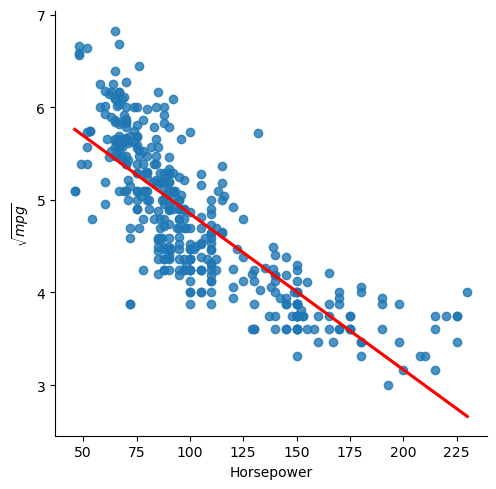

In [8]:
sns.lmplot(x = 'horsepower', y = 'sqrt_mpg', data = mpg, ci = None, line_kws = {'color': 'red'})
plt.xlabel("Horsepower")
plt.ylabel("$\sqrt{mpg}$");

The dip in our scatter plot is not as noticeable.

Then we looked at our residual plot.

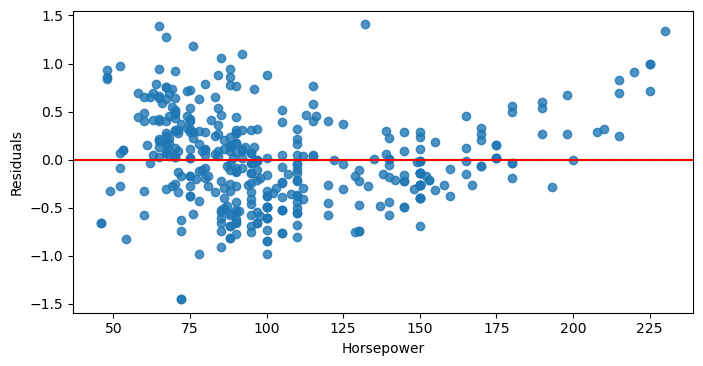

In [9]:
sns.residplot(x = "horsepower", y = "sqrt_mpg", data = mpg)
plt.axhline(y = 0, color = 'r')
plt.xlabel("Horsepower")
plt.ylabel("Residuals");

Re-expressing the response seemed to improve our residual plot. However, we still haven't quite captured the curvature in data, especially at the ends. Let's add more features!

# 3. Multiple Linear Regression

With real-world problems you will often want to use **multiple features** to model and predict a response variable. To do so,you can use multiple linear regression. 

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data. Formally, the model for multiple linear regression, given $n$ features is:

$$y = \theta_0 + \theta_1 x_2 + \theta_2 x_2 + … + \theta_n x_n $$

where each $\theta_i$ is an estimated linear parameter. This is what is meant by the phrase *"linear in the parameters"*. If you change the equation to

$$y = \theta_0 + \theta_1 x_2^2 + \theta_2 x_2 + … + \theta_n x_n$$

Then, it is no longer linear in variables (because of the squared term $\theta_2 x_2^2$) but it is still linear in parameters. And for (multiple) linear regression, that's all that matters because in the end, you are trying to find a set of $\theta$s that minimizes a loss function [(Data Science Exchange)](https://datascience.stackexchange.com/questions/12274/what-does-linear-in-parameters-mean).

Let's look at an example.

# 4. Advertising

Suppose that we are statistical consultants hired by a client to provide advice on how to improve sales of a particular product. The `ads` data set consists of the sales (in thousands of units) of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: internet, streaming radio, and tv (all in thousands of dollars). 

It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an **association between advertising and sales**, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets. [(An Introduction to Statistical Learning by Gareth James)](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf) 

In [10]:
ads = pd.read_csv("data/ads.csv",index_col = 0)
ads.head()

,internet,streaming_radio,tv,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Use the three code cells below to perform EDA on the `ads` data set.

### EDA Part 1 of 3

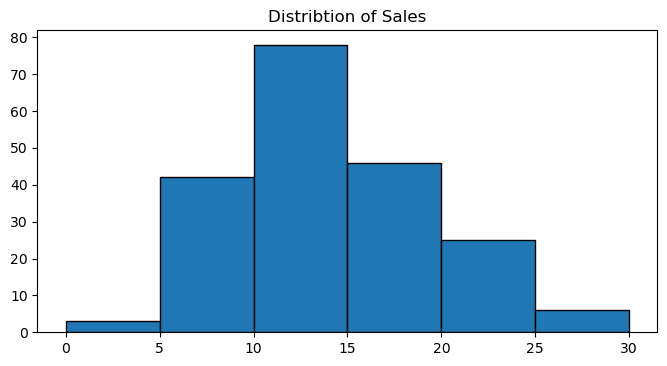

In [11]:
bins = np.arange(0, 35, 5)
plt.hist(ads["sales"], bins = bins, edgecolor = 'black')
plt.title("Distribtion of Sales");

### EDA Part 2 of 3

In [12]:
ads.corr()

,internet,streaming_radio,tv,sales
internet,1.000000,0.054809,0.056648,0.782224
streaming_radio,0.054809,1.000000,0.354104,0.576223
tv,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### EDA Part 3 of 3

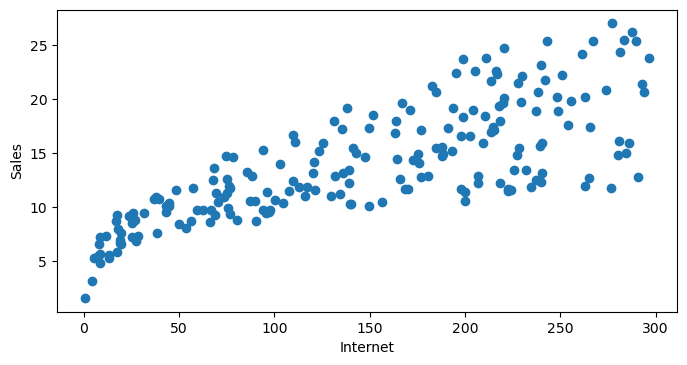

In [13]:
plt.scatter(x = ads.internet, y = ads.sales)
plt.xlabel("Internet")
plt.ylabel("Sales");

Now choose one feature, plot the residuals, fit a simple linear regression model, calculate the root mean squared error.

### SLR Step 1 of 4

Choose a single feature and plot the residuals.

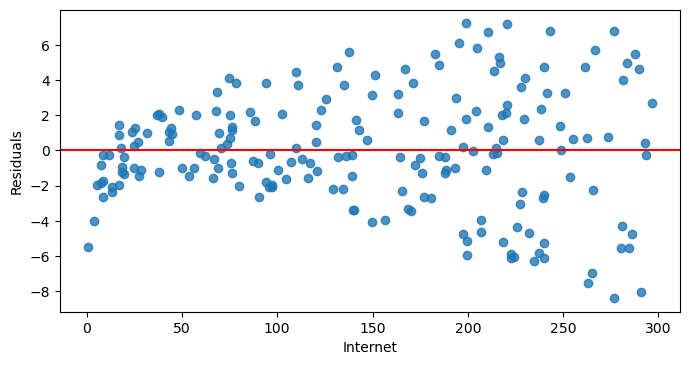

In [14]:
sns.residplot(x = "internet", y = "sales", data = ads)
plt.axhline(y = 0, color = 'r')
plt.xlabel("Internet")
plt.ylabel("Residuals");

### SLR Step 2 of 4

Fit a simple linear regression model using `sci-kit learn`.

In [15]:
sales = LinearRegression()
sales.fit(ads[['internet']], ads['sales'])

LinearRegression()

### SLR Step 3 of 4

Calculate the root mean squared error.

In [16]:
(np.sum(np.square(ads['sales'] - sales.predict(ads[['internet']]))/len(ads['sales'])))**.5

3.2423221486546887

### SLR Step 4 of 4 

Write 2-3 sentences to asses your model. For example you could the meaning of your estimated parameters for the slope and $y-$intercept, you could interpret the meaning of your value for RMSE, etc.

**Note:** Use the blank code cell below for additional programming analysis. Type your sentences in the markdown cell labeled *Type your answer here, replacing this text.*.

In [17]:
sales.coef_[0], sales.intercept_

(0.04753664043301975, 7.032593549127695)

From looking at the residual plot and scatter plot, it would appear that the data are not linear and predictions get worse with higher values of internet ad investment. As a result, the RMSE value is somewhat high relative to the values of the data itself, sometimes being even larger than data points. The slope, indicating a 1000 dollar increase in internet advertising is associated with a 1000 unit increase in sales, is also likely of limited use since it assumes a linear relationship where there isn't one.

By limiting our model to one feature, we may be leaving out information that could produce a better model. In other words, the region sales could be affected by more than just the advertising money spent on internet ads. Let's fir another model with an additional feature, then compare it to our single feature model.

In [18]:
sales2 = LinearRegression()
sales2.fit(ads[['internet', 'streaming_radio']], ads['sales'])
sales2_pred = sales2.predict(ads[['internet', 'streaming_radio']])

Now let's calculate the RMSE.

In [19]:
np.sum(np.square(ads['sales'] - sales2_pred))/len(ads['sales'])**(0.5)

39.37976518434026

Write 2-3 sentences to compare the `sales` model (simple linear regression using one predictor) to the `sales2` model (multiple linear regression using two predictors).

**Note:** Use the blank code cell below for additional programming analysis. Type your sentences in the markdown cell labeled *Type your answer here, replacing this text.*.

In [20]:
sales2.intercept_, sales2.coef_

(2.9210999124051362, array([0.04575482, 0.18799423]))

The model using multiple variables is significantly better than the model just using internet advertising. Whereas the RMSE of just the one variable model was nearly as large as many data points, the RMSE of the second model was much smaller than the vast majority of data points, rendering it much more useful in predicting sales.

**Question 1.** Given the equation

$$\text{sales}=\hat{\theta}_0+\hat{\theta}_1 \times \text{internet}+\hat{\theta}_2 \times \text{streaming_radio},$$

find the values for $\hat{\theta}_0$, $\hat{\theta}_1$, and $\hat{\theta}_2$ (rounded to 4 decimal places).

**Hint:** In Lab 10 we used the `.coef_` and the `.intercept_` methods on our model instance to retrieve the estimated parameters of our simple linear regression model.

In [21]:
theta0 = round(sales2.intercept_, 4)
theta1 = round(sales2.coef_[0], 4)
theta2 = round(sales2.coef_[1], 4)
theta0, theta1, theta2

(2.9211, 0.0458, 0.188)

In [22]:
grader.check("q1")

q1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.** Using the values for $\hat{\theta}_0$, $\hat{\theta}_1$, and $\hat{\theta}_2$ (rounded to 4 decimal places), in Latex ($\LaTeX$), write out the function that the model `sales2` is using to predict `sale` from `internet` and `streaming_radio`.

**Hint:** Click [here](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) to view a brief two page guide on typesetting math equations in Latex. If you still need help, as a neighbor or your instructor.

$\text{sales} = 2.9211 + 0.0458 \times \text{internet} + 0.1880 \times \text{streaming_radio}$

<!-- END QUESTION -->

## Interpreting the Model Parameters

- Each  parameter represents the change in the mean response, $\hat y$, per unit increase in the associated predictor variable when all the other predictors are held constant.

- For example,  $\theta_1 = 0.0458$, represents the estimated change in the mean response, $\hat y$, per unit increase in the amount spent on internet advertising when the amount spent on streaming radio advertisement is held constant.

- The intercept term, $\theta_0 = 2.9211$, represents the estimated mean response, $\hat y$, when all the predictors (amount spent in advertising on internet and streaming radio) are all zero (which may or may not have any practical meaning).

<!-- BEGIN QUESTION -->

**Question 3.** In our situation would it make sense to interpret the intercept term? Write 2-3 sentences to explain your answer. 

It would make sense to interpret the intercept term since this is the predicted units of sales (in thousands) when there is no money spent on advertising via streaming radio or the internet. Since no money spent on advertising via these sources is a reasonable assumption, there is nothing wrong with interpreting the value of the intercept in context.

<!-- END QUESTION -->

# 5. R Squared

$R^2$, denoted by

$$R^2 = \frac{\text{variance of fitted values}}{\text{variance of true } y} = \frac{\hat{\sigma}_{y}^2}{\sigma_y^2}$$

is a goodness-of-fit measure for linear regression models.

This statistic indicates the percentage of the variance in the dependent variable that the independent variable(s) explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0$-$100% scale.

Unlike $r$, the correlation coefficient we looked at in Lab 10, $R^2$, the **coefficient of determination**, can be used in the multiple regression setting. In simple regression, $r^{2}$ and Multiple $R^{2}$ are the same.

To see exactly how much better our new model is, we can compare the Multiple $R^2$ from the simple linear and multiple linear fits.

## Which Metric Should You Use?

When assessing how well a model fits a data set, it’s useful to calculate both the RMSE and the $R^2$ value because each metric tells us something different.

- One one hand, RMSE tells us the typical distance between the predicted value made by the regression model and the actual value.

- On the other hand, $R^2$ tells us how well the predictor variables can explain the variation in the response variable.

**Question 4.** Calculate the R-squared value for both the `sales` and `sales2` model.

In [23]:
from sklearn.metrics import r2_score
r2_sales = np.var(sales.predict(ads[['internet']])) / np.var(ads['sales'])
r2_sales2 = np.var(sales2.predict(ads[['internet', 'streaming_radio']])) / np.var(ads['sales'])
#r2_sales, r2_score(ads['sales'], sales.predict(ads[['internet']])), r2_sales2, r2_score(ads['sales'], sales2.predict(ads[['internet', 'streaming_radio']]))

In [24]:
grader.check("q4")

q4 results: All test cases passed!

## Limitations of R-squared

- R-squared can't determine whether the coefficient estimates ($theta_i$s) and predictions ($\hat y_i$s) are biased, which is why you must assess the residual plots.

- R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data.

With this in mind let's examine our residual plots.

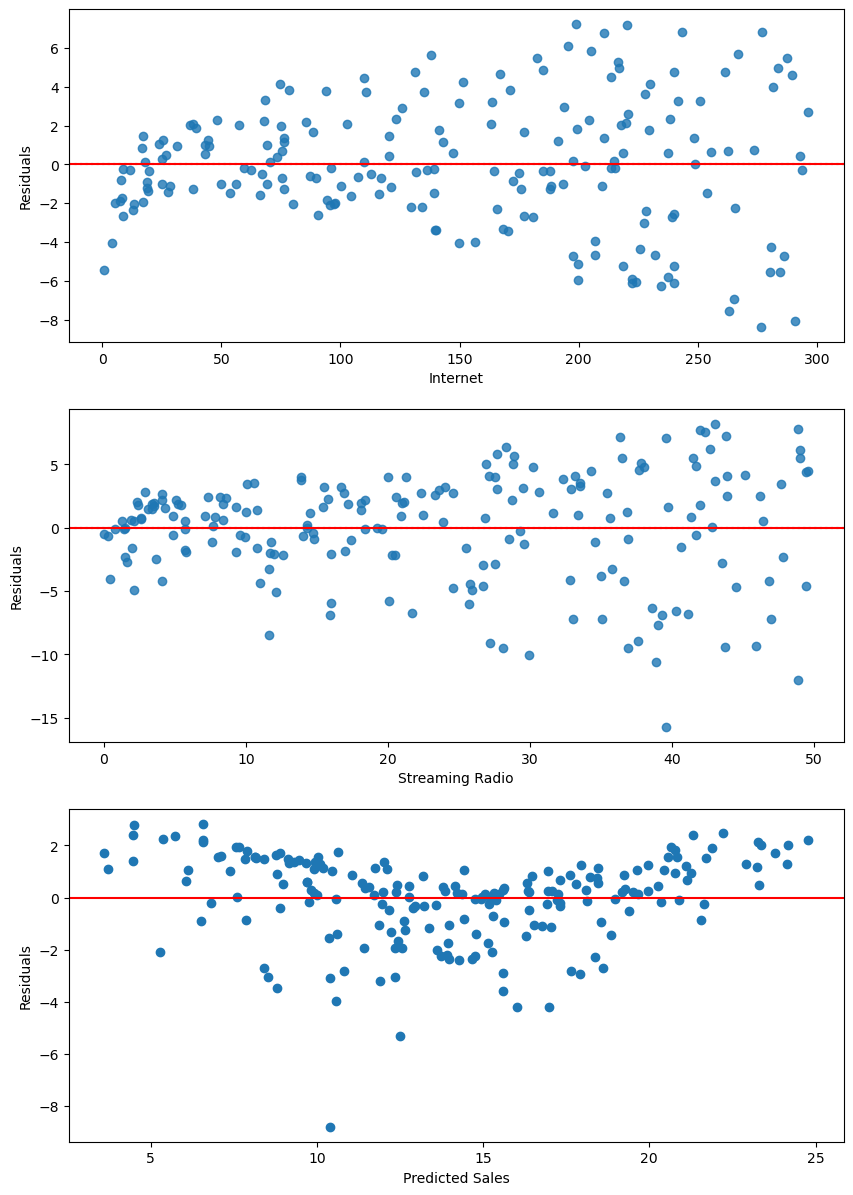

In [25]:
plt.figure(figsize = [10, 15])

plt.subplot(3, 1, 1)
sns.residplot(x = "internet", y = "sales", data = ads)
plt.axhline(y = 0, color = 'r')
plt.xlabel('Internet')
plt.ylabel("Residuals")

plt.subplot(3, 1, 2)
sns.residplot(x = "streaming_radio", y = "sales", data = ads)
plt.axhline(y = 0, color = 'r')
plt.xlabel('Streaming Radio')
plt.ylabel("Residuals")

plt.subplot(3, 1, 3)
plt.scatter(sales2_pred, ads['sales'] - sales2_pred)
plt.axhline(y = 0, color = 'r')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals');

Our residual plot for `Predicted Sales` has a dip. This indicates a nonlinear relationship in the original data set. We could try re-expression, fitting a nonlinear model, etc. Since the goal of this unit in the course is to introduce you to the idea of statistical modeling, techniques beyond what we have discussed will not be explored. 

Every time you add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms. If a model has too many predictors, it begins to model the random noise in the data. This condition is known as overfitting the model and it produces misleadingly high R-squared values and a lessened ability to make predictions.

R-squared is a handy, seemingly intuitive measure of how well your linear model fits a set of observations. However, R-squared doesn’t tell us the entire story. You should evaluate R-squared values in conjunction with residual plots, other model statistics (not part of this course), and subject area knowledge when choosing a statistical model.

# 6. Open Analysis

Now it's your turn to develop a multiple linear regression model. Use the `mpg` data set and fit a multiple linear regression model (mlr) on more than one of the numerical predictors. Keep in mind how residual plots, RMSE, and R-squared can be used to help you compare the models you fit. Fit at least two mlr models using different predictors. Compare your results, choose one of your models, and interpret your results from the model you choose. Make sure you provide written commentary as your perform your analysis.

**Note:** This part of the notebook will count 15 points towards the total grade of 20. It will be graded using the following rubric:

|**Description**|**Points**|
|---------------|----------|
|EDA (numerical and graphical analysis)| 5|
|Model development|5|
|Written Commentary|5|

## EDA

First, we start with a basic histogram of the `mpg` variable to see what kind of data is being predicted. It shows a slightly right-skewed distribution with high spread. The spread may help though, since it could indicate there are more distinct options to predict.

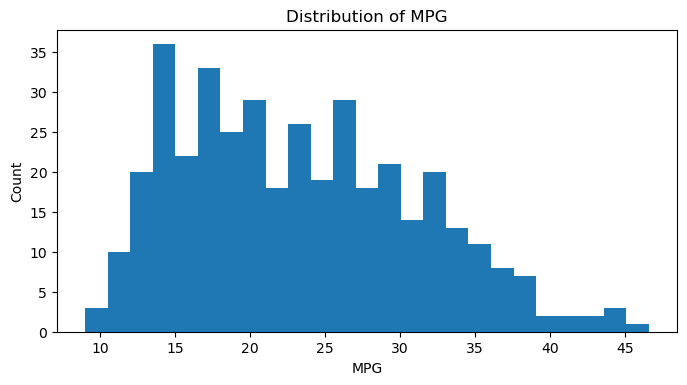

In [26]:
plt.hist(mpg['mpg'], bins=25)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Count');

Next, a table of correlations shows what variables may be of the most interest. `sqrt_mpg` may be ignored, since it is derived from `mpg` itself. Other promising variables include `weight`, `displacement`, and `horsepower`.

In [27]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,sqrt_mpg
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.996015
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.806211
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.833324
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.807109
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.857718
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.436874
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580933
sqrt_mpg,0.996015,-0.806211,-0.833324,-0.807109,-0.857718,0.436874,0.580933,1.000000


Here is a few scatter plots for all of the variables that seemed promising. All three of them seem to show some curve, meaning there might be some transformation necessary to improve model accuracy. However, the experience from Lab 10 suggests that the difference may be minimal when just taking the square root.

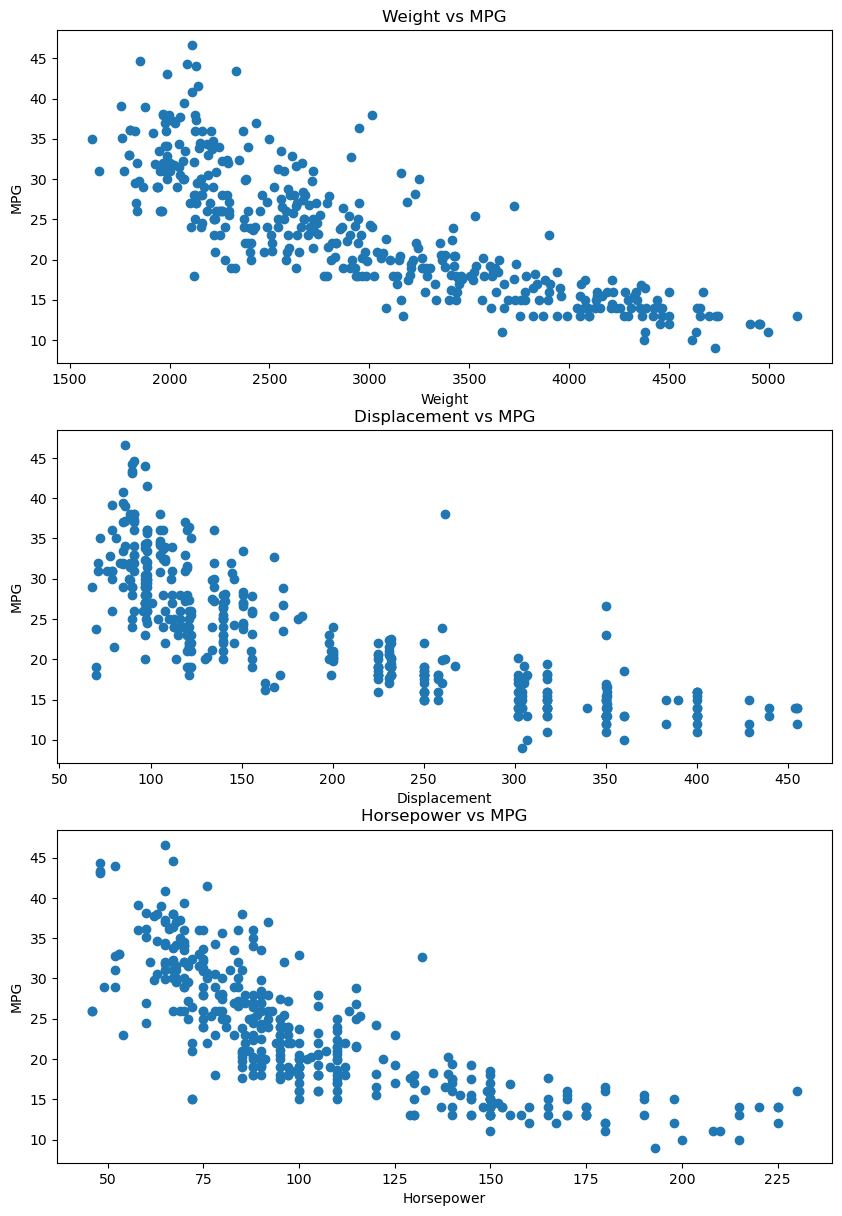

In [28]:
plt.figure(figsize = [10, 15])

plt.subplot(3, 1, 1)
plt.scatter(mpg['weight'], mpg['mpg'])
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.subplot(3, 1, 2)
plt.scatter(mpg['displacement'], mpg['mpg'])
plt.title('Displacement vs MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')

plt.subplot(3, 1, 3)
plt.scatter(mpg['horsepower'], mpg['mpg'])
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG');

After doing some exploratory modeling, it was noticed that because all three of the promising variables were highly correlated with each other as well as with `mpg`, the predictive power of all three combined was almost the same as just one of them individually. Instead, some variables less correlated with `mpg` but also not very correlated with each other could be of use. The scatter plots below show these relationships.

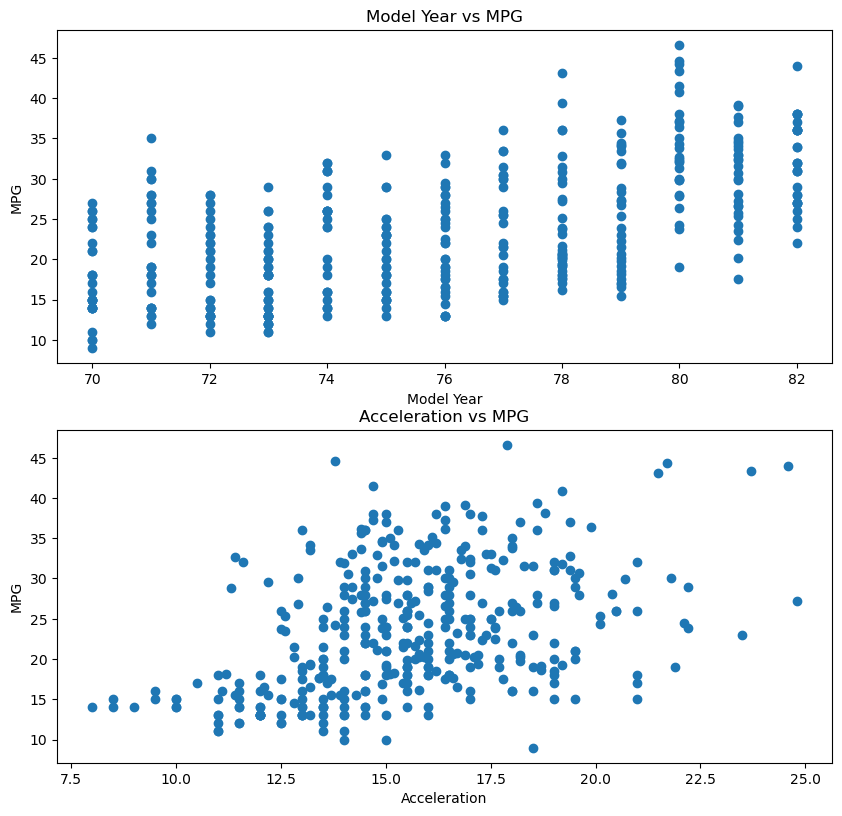

In [29]:
plt.figure(figsize = [10, 15])

plt.subplot(3, 1, 1)
plt.scatter(mpg['model_year'], mpg['mpg'])
plt.title('Model Year vs MPG')
plt.xlabel('Model Year')
plt.ylabel('MPG')

plt.subplot(3, 1, 2)
plt.scatter(mpg['acceleration'], mpg['mpg'])
plt.title('Acceleration vs MPG')
plt.xlabel('Acceleration')
plt.ylabel('MPG');

## Modeling

Since Lab 10 did not see much improvement when it came to transforming the variables, this model will attempt to predict using all three of the promising variables without transformation or re-expression. The following code is a pretty standard use of the sklearn `LinearRegression` model to fit a multivariable linear regression model.

In [30]:
model = LinearRegression()
model.fit(mpg[['weight', 'displacement', 'horsepower']], mpg['mpg'])

LinearRegression()

Our second model is quite similar, just replacing `displacement` and `horsepower` with `model_year` and `acceleration` for the reasons highlighted in the EDA section.

In [31]:
model2 = LinearRegression()
model2.fit(mpg[['weight', 'model_year', 'acceleration']], mpg['mpg'])

LinearRegression()

Now that the model is trained, one can examine the intercept and coefficients used in the model. This gives the equation $ \text{mpg} = 44.8559 - 0.0054 \times \text{weight} - 0.0058 \times \text{displacement} - 0.0416 \times \text{horsepower} $

In [32]:
model.intercept_, model.coef_

(44.85593569526508, array([-0.00535159, -0.00576882, -0.04167414]))

Again, our second model is quite similar, but with the equation $ \text{mpg} = -14.9366 - 0.0066 \times \text{weight} + 0.7484 \times \text{model_year} + 0.0664 \times \text{acceleration} $

In [33]:
model2.intercept_, model2.coef_

(-14.936555253243998, array([-0.00655413,  0.74844602,  0.06635932]))

## Evaluation

To evaluate the model, we can use the `RMSE` to show the typical error of the model. For the first model, we get an error of about 4.22, which is close to 0.6 better than just using `weight`, showing at least some improvement.

In [34]:
np.sqrt(np.mean(np.square(mpg['mpg'] - model.predict(mpg[['weight', 'displacement', 'horsepower']]))))

4.219737926479926

Only 3.41 suggests that the second model is pretty close to the actual value of MPG, with errors around 10% of the value itself roughly. This is also about 1.5 MPG better than the model just using weight, showing clear improvement.

In [35]:
np.sqrt(np.mean(np.square(mpg['mpg'] - model2.predict(mpg[['weight', 'model_year', 'acceleration']]))))

3.4101071807942813

Another way to evaluate the model is using the $R^2$ value. This coefficient of determination allows measuring how effective the model is at predicting the `mpg` variable on a scale of 0 to 1. On the first model, we achieve a value of 0.71, which is pretty decent and seemingly worthy on its own if it weren't for the second model.

In [36]:
np.var(model.predict(mpg[['weight', 'displacement', 'horsepower']])) / np.var(mpg['mpg'])

0.7069554693444716

For the second model we get a value of about 0.81, which is very good and suggests that the model is pretty accurate in being able to predict `mpg` given the `weight`, `model_year`, and `acceleration` variables.

In [37]:
np.var(model2.predict(mpg[['weight', 'model_year', 'acceleration']])) / np.var(mpg['mpg'])

0.8086190437986225

## Conclusion

Since our second model performed a decent bit better than the first on both metrics for evaluation, it should be the one selected. Via the `RMSE`, it showed it averaged an error of just 3.41 MPH when predicting using the `weight`, `model_year`, and `acceleration`. According to the $R^2$ value, the model was able to account for about 81% of the variation in the actual `mpg` variable.

## Bonus

As a final way to evaluate the efficacy of the second model at predicting `mpg`, we can look at the residual plots with respect to each of the variables used in the model. The last plot shows the residuals for the model as a whole.

All of these show the same pattern with a dip, which is a fragment of the decision not to perform and transforms or re-expression of any variables in the model. The pattern appears to follow a slant asymptote similar to $ \frac{x^2}{x-1} $. Correcting for such a function may be somewhat difficult, but ultimately the impressive results as the model currently works are convincing enough whilst being rather simple in execution.

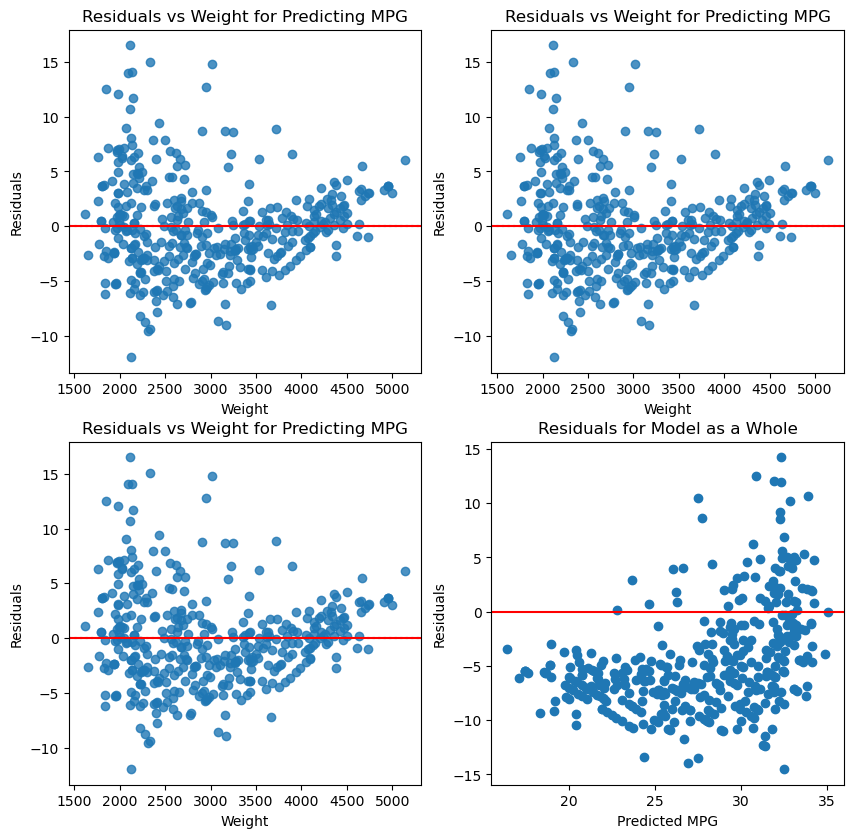

In [38]:
plt.figure(figsize = [10, 10])

plt.subplot(2, 2, 1)
sns.residplot(x = 'weight', y = 'mpg', data = mpg)
plt.axhline(y = 0, color = 'r')
plt.title('Residuals vs Weight for Predicting MPG')
plt.xlabel('Weight')
plt.ylabel('Residuals')

plt.subplot(2, 2, 2)
sns.residplot(x = 'weight', y = 'mpg', data = mpg)
plt.axhline(y = 0, color = 'r')
plt.title('Residuals vs Weight for Predicting MPG')
plt.xlabel('Weight')
plt.ylabel('Residuals')

plt.subplot(2, 2, 3)
sns.residplot(x = 'weight', y = 'mpg', data = mpg)
plt.axhline(y = 0, color = 'r')
plt.title('Residuals vs Weight for Predicting MPG')
plt.xlabel('Weight')
plt.ylabel('Residuals')

plt.subplot(2, 2, 4)
plt.scatter(model.predict(mpg[['weight', 'model_year', 'acceleration']]), mpg['mpg'] - model.predict(mpg[['weight', 'model_year', 'acceleration']]))
plt.axhline(y = 0, color = 'r')
plt.title('Residuals for Model as a Whole')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals');

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [39]:
grader.check_all()

q1 results: All test cases passed!

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

When done exporting, download the .zip file by `SHIFT`-clicking on the file name and selecting **Save Link As**. Or, find the .zip file in the left side of the screen and right-click and select **Download**. You'll submit this .zip file for the assignment in Canvas to Gradescope for grading.

In [36]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)